# Content Monetization Modeler

End-to-end regression project to predict YouTube ad revenue.

## 1. Imports

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib


## 2. Load Dataset

In [16]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\youtube_ad_revenue_dataset.csv")
df.head()


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


## 3. Data Understanding

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [18]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


## 4. Data Quality Checks

In [19]:
df.duplicated().sum()

np.int64(2400)

In [20]:
df.isna().mean() * 100

video_id                0.000000
date                    0.000000
views                   0.000000
likes                   4.997549
comments                4.993464
watch_time_minutes      4.987745
video_length_minutes    0.000000
subscribers             0.000000
category                0.000000
device                  0.000000
country                 0.000000
ad_revenue_usd          0.000000
dtype: float64

## 5. Exploratory Data Analysis

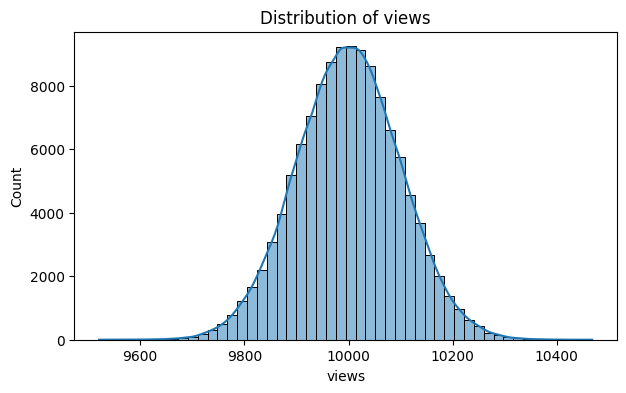

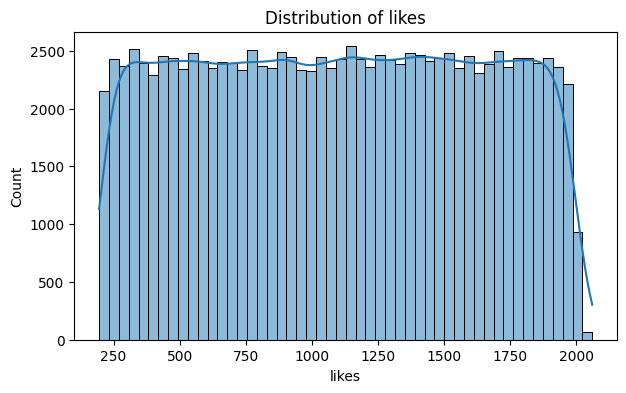

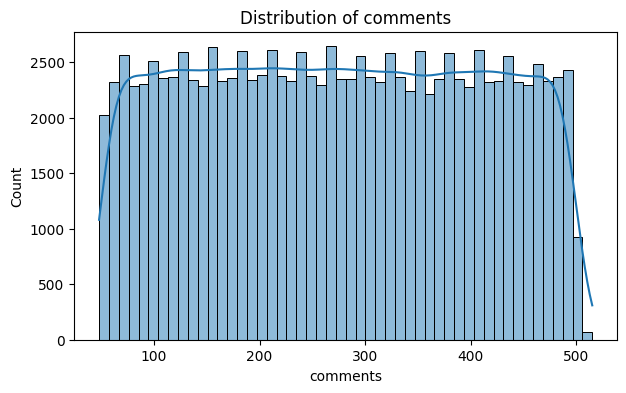

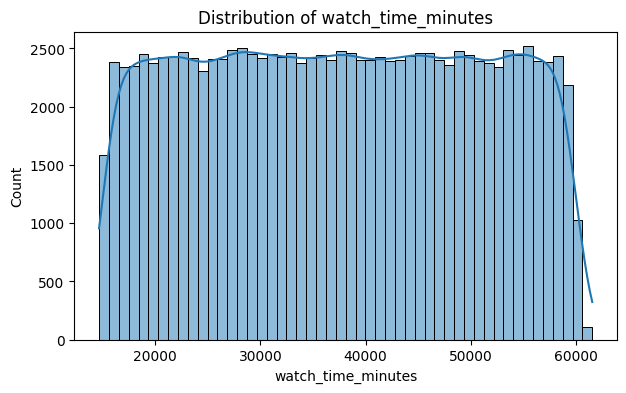

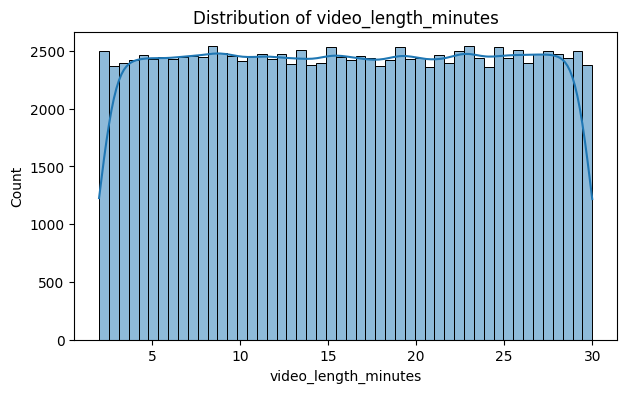

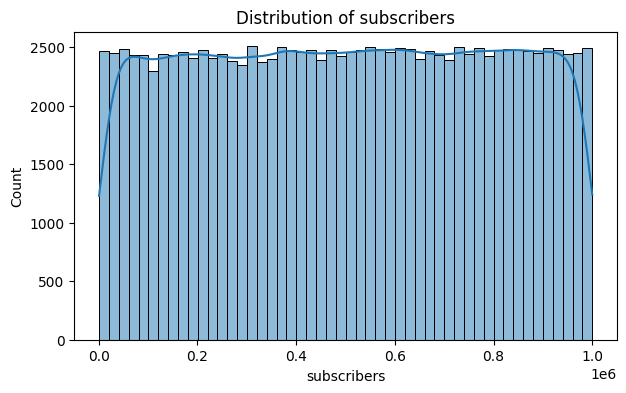

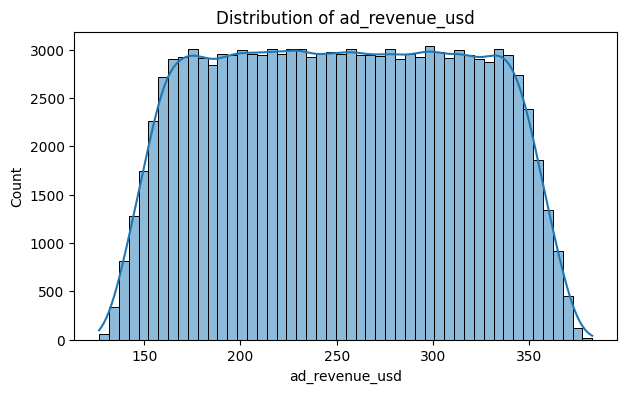

In [21]:
numeric_cols = ['views','likes','comments','watch_time_minutes',
                'video_length_minutes','subscribers','ad_revenue_usd']

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


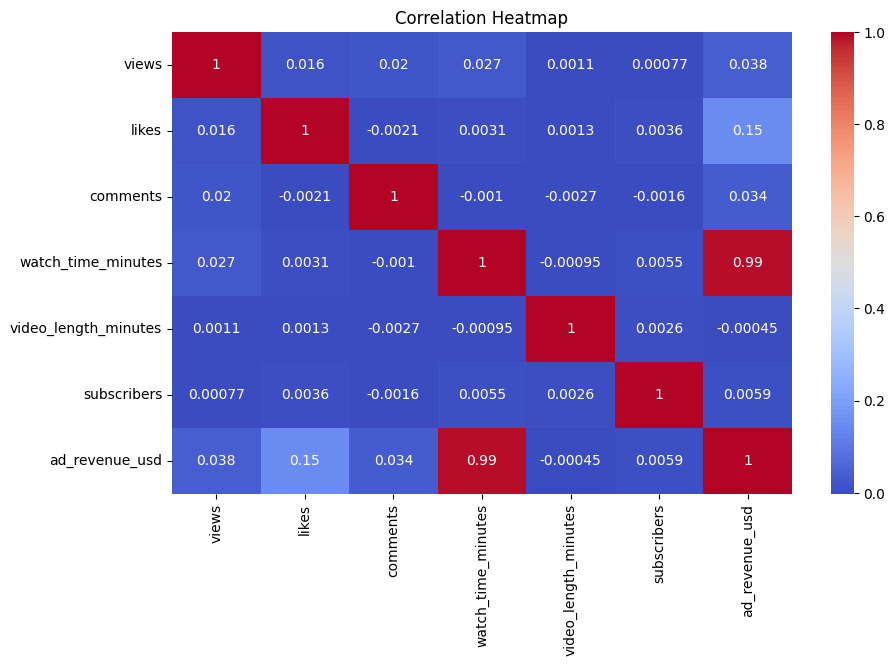

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 6. Data Cleaning

In [23]:
df = df.drop_duplicates()

for col in ['likes','comments','watch_time_minutes']:
    df[col] = df[col].fillna(df[col].mean())

## 7. Feature Engineering

In [24]:
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']
df['avg_watch_time_per_view'] = df['watch_time_minutes'] / df['views']

## 8. Train Test Split

In [25]:
X = df.drop(columns=['ad_revenue_usd','video_id','date'], errors='ignore')
y = df['ad_revenue_usd']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 9. Model Building & Comparison

In [26]:
cat_features = X_train.select_dtypes(include=['object']).columns
num_features = X_train.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
    ('num', 'passthrough', num_features)
])

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results[name] = {
        "R2": r2_score(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "MAE": mean_absolute_error(y_test, preds)
    }

results_df = pd.DataFrame(results).T.sort_values("R2", ascending=False)
results_df

,R2,RMSE,MAE
LinearRegression,0.952574,13.480053,3.111614
GradientBoosting,0.952279,13.521928,3.623577
RandomForest,0.949655,13.888649,3.567672
DecisionTree,0.896485,19.915212,5.404995


## 10. Final Model & Saving

In [27]:
final_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), [
        'views','likes','comments','watch_time_minutes',
        'video_length_minutes','subscribers',
        'engagement_rate','avg_watch_time_per_view'
    ]),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['category','device','country'])
])

final_model = Pipeline([
    ('preprocessor', final_preprocessor),
    ('model', LinearRegression())
])

final_model.fit(X_train, y_train)

joblib.dump(final_model, "C:\\Users\\USER\\OneDrive\\Desktop\\contentmodel\\bestfit.joblib")

print("Model saved as bestfit.joblib")

Model saved as bestfit.joblib


## 11. Sample Predictions

In [28]:

loaded = joblib.load("bestfit.joblib")
sample_X = X_test.head(5)
sample_y = y_test.head(5)

preds = loaded.predict(sample_X)

for i in range(len(preds)):
    print(f"Predicted: ${preds[i]:.2f} | Actual: ${sample_y.iloc[i]:.2f}")


Predicted: $352.93 | Actual: $352.85
Predicted: $342.24 | Actual: $341.98
Predicted: $204.56 | Actual: $204.59
Predicted: $176.42 | Actual: $176.84
Predicted: $270.88 | Actual: $270.84
